In [102]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from PIL import Image
import random 
import os

import tensorflow as tf
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array

from keras.utils import plot_model
from sklearn.metrics import confusion_matrix , classification_report , roc_curve ,auc



### Image reading

In [2]:
def plot_img_from_dir( directory_path  , class_animal , num_images = 9):
    image_filenames = os.listdir(directory_path) 
    #retrive list of all file names

    if len(image_filenames) < num_images :
        print( f"Only found { len(image_filenames)} images in { directory_path} , diplaying them ")
        num_images = len(image_filenames)

    selected_images = random.sample( image_filenames , num_images)

    fig , axes = plt.subplots( 3 , 3 ,figsize = (8 , 8 ))
    axes = axes.ravel() # flatten high dem to 1d

    for i , image_file in enumerate(selected_images):
        image_path = os.path.join( directory_path , image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image : { class_animal} ")
        # axes.axis('off')

    plt.tight_layout()
    plt.show()

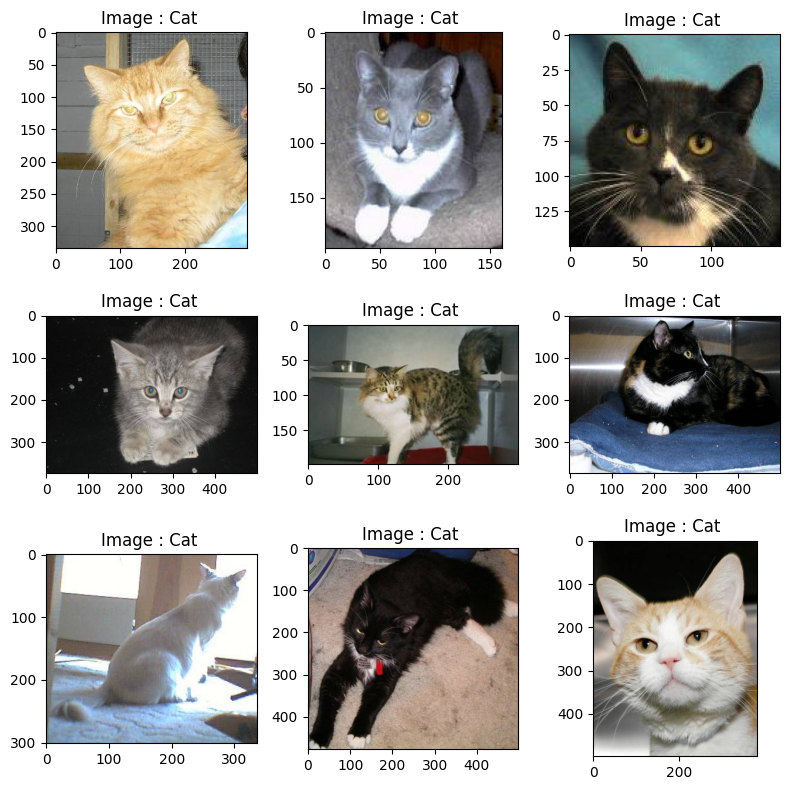

In [3]:
cat_path_dir = 'data/train/cats'
plot_img_from_dir(cat_path_dir , class_animal = 'Cat')

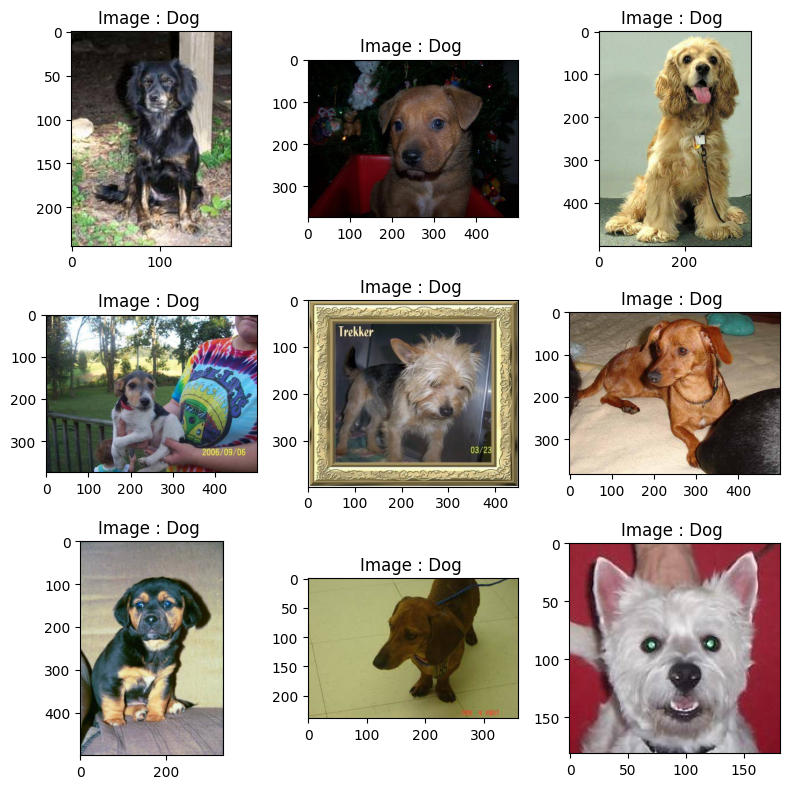

In [4]:
dog_path_dir= 'data/train/dogs'
plot_img_from_dir(dog_path_dir , class_animal = 'Dog')

### Data Analysis

In [5]:
cat_img = os.listdir(cat_path_dir)
dog_img = os.listdir(dog_path_dir)

classes_animal = ['Cats' , 'Dogs' ]

count = [ len(cat_img) , len(dog_img) ] 
print(count)

[10000, 10000]


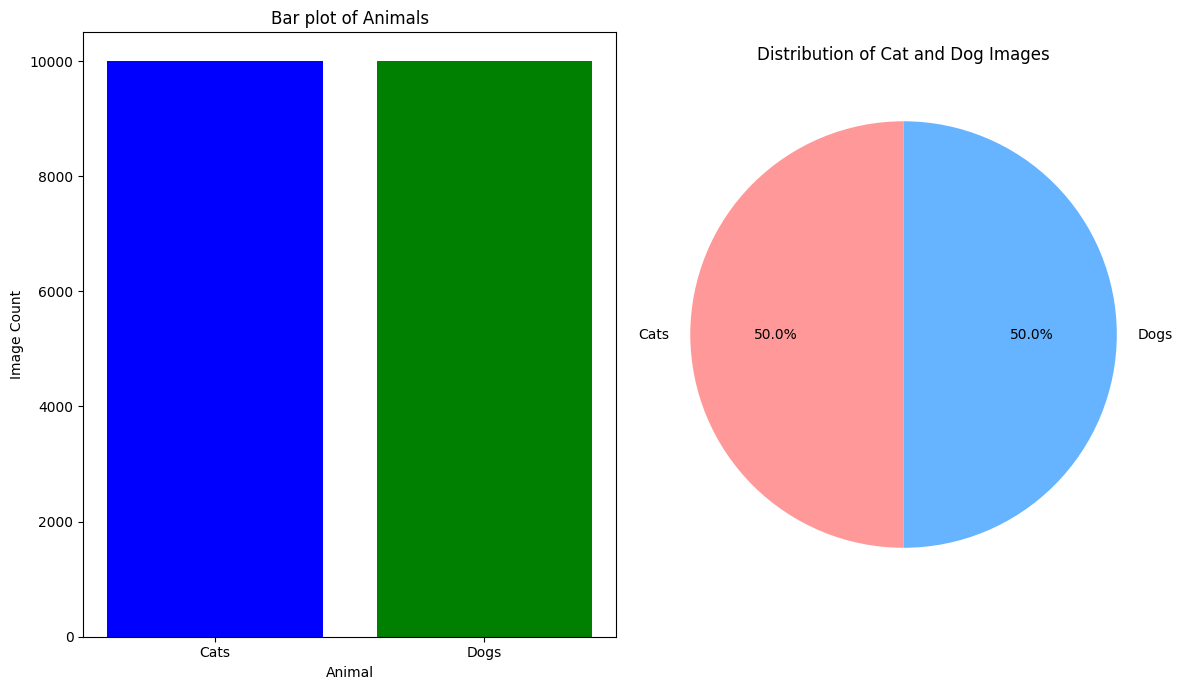

In [6]:
# bar plot and chart plot

fig , ax = plt.subplots( 1 ,2 , figsize = ( 12 , 7))

ax[0].bar( classes_animal , count , color = ['blue' , 'green'])
ax[0].set_title('Bar plot of Animals')
ax[0].set_xlabel('Animal')
ax[0].set_ylabel('Image Count')

colors = ['#ff9999' , '#66b3ff']
ax[1].pie(count , labels = classes_animal , colors = colors , autopct = '%1.1f%%' , startangle = 90 )
ax[1].set_title('Distribution of Cat and Dog Images')

0;
plt.tight_layout()
plt.show()


In [7]:
import os
import cv2
import imghdr

### Removing Currupted Images

In [8]:
img_exts = ['jpeg' , 'jpg' , 'png']

data_dir = 'data/'

for root , dirs , files in os.walk( data_dir):
    for file in files :
        file_path = os.path.join(root , file)

        try :
            file_type = imghdr.what(file_path) # check file type
    
            if file_type not in img_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else :
                img = cv2.imread(file_path) # image read
    
        except Exception as e:
            print(f'Issue with file {file_path} . Error : {e}')
            os.remove(file_path)

In [9]:
#tf.config.experimental.list_physical_devices('GPU')

### Loading shapes and channels 
-using numpy , cv2 , python

In [10]:
# numpy
import numpy as np
from PIL import Image

def img_to_array(image_path):
    try :
        with Image.open(image_path) as img :
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f'Could not read the image file at {image_path}.')
        return None

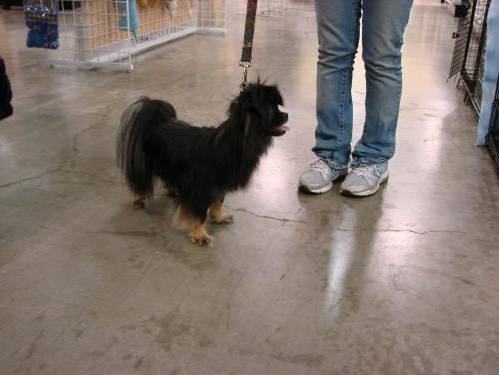

In [11]:
Image.open('data/train/dogs/dog.1000.jpg')

In [12]:
img_to_array('data/train/dogs/dog.1000.jpg')

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]

In [13]:
# using cv2 

image = 'data/train/dogs/dog.1000.jpg'

import cv2 

img = cv2.imread(image)

if img is not None :
    # print(img)
    print(img.shape)
else :
    print("IMage could not be loaded") # path or permission issues

(375, 499, 3)


### Building Model

In [21]:
# imageDataGenerator -> to load images in batches 

baseDir = 'data/train'

train_datagen = ImageDataGenerator(rescale = 1./255  , validation_split = 0.2)

In [22]:
# using 20 % of data for validation 

train_generator = train_datagen.flow_from_directory(
    baseDir , 
    target_size = (150 , 150),
    batch_size = 20 , 
    class_mode = 'binary',
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    baseDir ,
    target_size = ( 150 , 150 ),
    batch_size = 20 ,
    class_mode = 'binary',
    subset = 'validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [25]:
# getting class labels

# accesing class labels for training data

train_class_labels = train_generator.class_indices

print('Training Class labels :' , train_class_labels)

validation_class_labels = validation_generator.class_indices
print('Validation Class Labels : ', validation_class_labels)

Training Class labels : {'cats': 0, 'dogs': 1}
Validation Class Labels :  {'cats': 0, 'dogs': 1}


### Visualising the Batch Images

In [29]:
images , labels = next(train_generator)
images , labels

(array([[[[0.03921569, 0.00392157, 0.01568628],
          [0.03921569, 0.00392157, 0.01568628],
          [0.03529412, 0.        , 0.01176471],
          ...,
          [0.3137255 , 0.23137257, 0.21176472],
          [0.30588236, 0.22352943, 0.20392159],
          [0.3019608 , 0.21960786, 0.20784315]],
 
         [[0.03921569, 0.00392157, 0.01568628],
          [0.03921569, 0.00392157, 0.01568628],
          [0.03529412, 0.        , 0.01176471],
          ...,
          [0.3137255 , 0.23137257, 0.21176472],
          [0.30980393, 0.227451  , 0.20784315],
          [0.30588236, 0.22352943, 0.21176472]],
 
         [[0.03921569, 0.00392157, 0.01568628],
          [0.03921569, 0.00392157, 0.01568628],
          [0.03529412, 0.        , 0.01176471],
          ...,
          [0.32156864, 0.2392157 , 0.21960786],
          [0.31764707, 0.23529413, 0.21568629],
          [0.30980393, 0.227451  , 0.21568629]],
 
         ...,
 
         [[0.10980393, 0.1137255 , 0.18431373],
          [0.11764

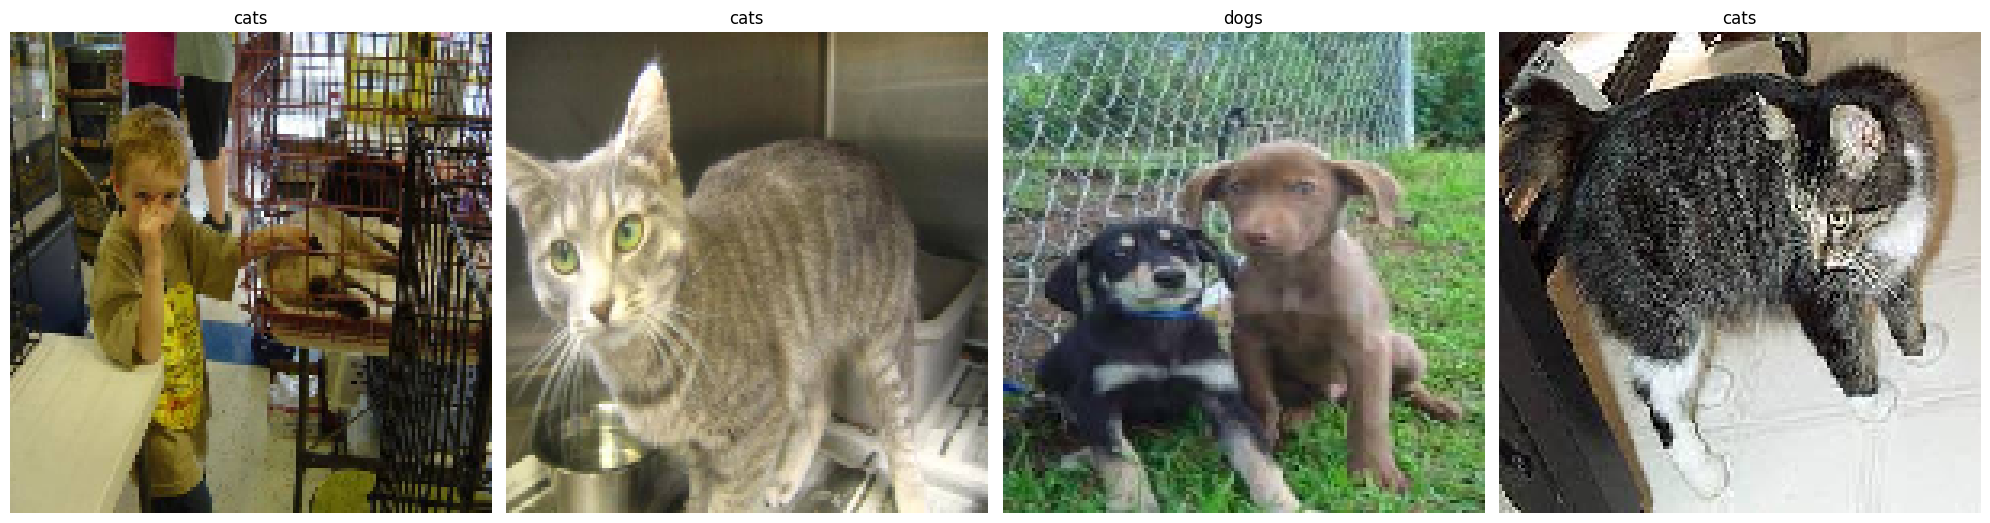

In [33]:
import matplotlib.pyplot as plt

def plot_images_from_generator( generator , num_images = 4):
    images , labels = next(generator )

    # fig setup
    fig , ax = plt.subplots(1 , num_images , figsize = (20 , 20))
    ax = ax.flatten()

    for img , label , axi in zip(images , labels , ax):
        axi.imshow(img)

        class_labels = dict(( v, k) for k , v in generator.class_indices.items())
        axi.set_title(class_labels[int(label)])
        axi.axis('off')

    plt.tight_layout()
    plt.show()

plot_images_from_generator(train_generator, num_images = 4)
                           

In [32]:
# train_generator.class_indices.items()

dict_items([('cats', 0), ('dogs', 1)])

In [35]:
train_generator.reset() # so that it starts from beginning

## CNN Model

In [43]:
model = models.Sequential([
    layers.Conv2D( 32 , (3 , 3) , activation ='relu' , input_shape = ( 150 , 150 , 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3 ,3) , activation = 'relu'),
    layers.MaxPooling2D(2 , 2),
    layers.Conv2D(128 , (3,3) , activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128 ,(3,3) , activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense( 512 , activation = 'relu'),
    layers.Dense( 1 , activation = 'sigmoid')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)      0

In [48]:
plot_model(model ,
           show_shapes = True , show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
# !pip install pydot

In [51]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
              
              

In [52]:
batch = 20 

train_steps = np.ceil(train_generator.samples/batch)
validation_steps_per_batch = np.ceil(validation_generator.samples/batch)
print(train_steps , validation_steps_per_batch)

800.0 200.0


In [53]:
mod_fit = model.fit(
    train_generator ,
    steps_per_epoch =800 ,
    epochs = 10 ,
    validation_data = validation_generator ,
    validation_steps = 200 )

Epoch 1/10
800/800 [==============================] - 45s 42ms/step - loss: 0.6617 - accuracy: 0.5904 - val_loss: 0.6333 - val_accuracy: 0.6332
Epoch 2/10
800/800 [==============================] - 28s 35ms/step - loss: 0.5612 - accuracy: 0.7089 - val_loss: 0.5192 - val_accuracy: 0.7423
Epoch 3/10
800/800 [==============================] - 33s 41ms/step - loss: 0.4800 - accuracy: 0.7684 - val_loss: 0.5039 - val_accuracy: 0.7510
Epoch 4/10
800/800 [==============================] - 36s 44ms/step - loss: 0.4200 - accuracy: 0.8060 - val_loss: 0.4069 - val_accuracy: 0.8183
Epoch 5/10
800/800 [==============================] - 33s 41ms/step - loss: 0.3632 - accuracy: 0.8397 - val_loss: 0.3716 - val_accuracy: 0.8393
Epoch 6/10
800/800 [==============================] - 33s 41ms/step - loss: 0.3089 - accuracy: 0.8660 - val_loss: 0.3344 - val_accuracy: 0.8535
Epoch 7/10
800/800 [==============================] - 37s 47ms/step - loss: 0.2491 - accuracy: 0.8954 - val_loss: 0.3292 - val_accuracy:

In [55]:
mod_fit.history

{'loss': [0.6616579294204712,
  0.5611889362335205,
  0.4799904227256775,
  0.42003247141838074,
  0.3631693422794342,
  0.30887115001678467,
  0.24913987517356873,
  0.19329605996608734,
  0.15249182283878326,
  0.10501217842102051],
 'accuracy': [0.5903750061988831,
  0.7089375257492065,
  0.7683749794960022,
  0.8059999942779541,
  0.8396875262260437,
  0.8659999966621399,
  0.895437479019165,
  0.9203749895095825,
  0.9375,
  0.960562527179718],
 'val_loss': [0.633279025554657,
  0.5192383527755737,
  0.5039231777191162,
  0.40690353512763977,
  0.37157395482063293,
  0.33442044258117676,
  0.32920876145362854,
  0.38486820459365845,
  0.4060456454753876,
  0.4583483338356018],
 'val_accuracy': [0.6332499980926514,
  0.7422500252723694,
  0.7509999871253967,
  0.8182500004768372,
  0.8392500281333923,
  0.8535000085830688,
  0.8612499833106995,
  0.8650000095367432,
  0.8557500243186951,
  0.8485000133514404]}

In [56]:
acc = mod_fit.history['accuracy']
val_acc = mod_fit.history['val_accuracy']
loss = mod_fit.history['loss']
val_loss = mod_fit.history['val_loss']

In [57]:
epochs_range = range(len(acc))

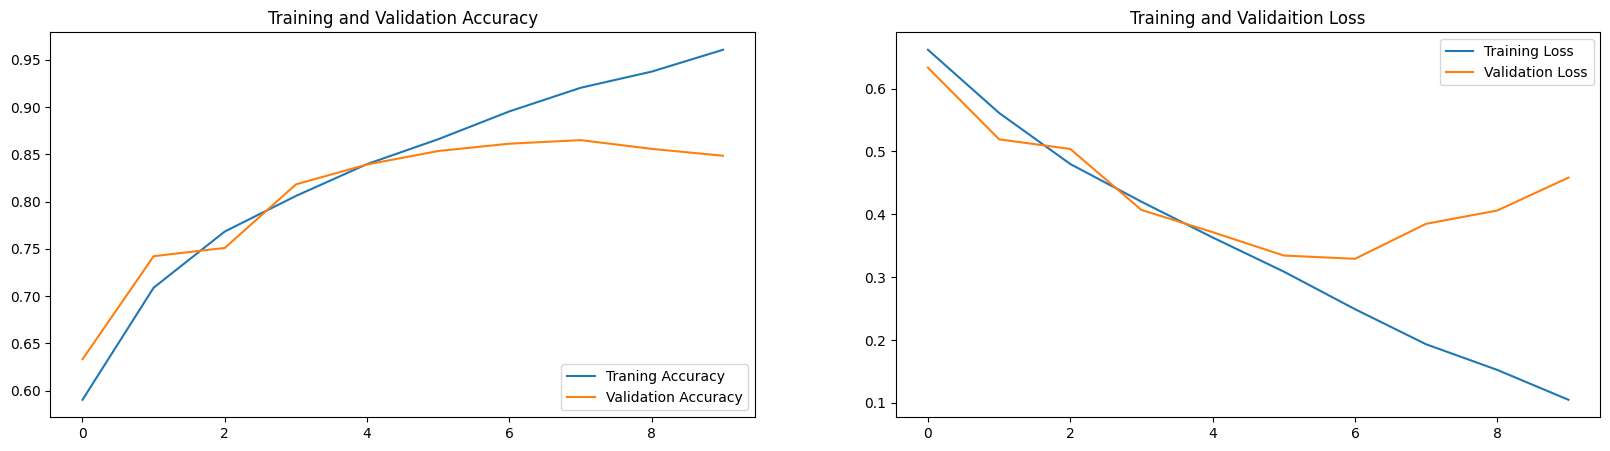

In [59]:
plt.figure(figsize =  (20 , 5))
plt.subplot(121)
plt.plot(epochs_range , acc , label = 'Traning Accuracy')
plt.plot(epochs_range , val_acc , label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(122)
plt.plot(epochs_range , loss , label = 'Training Loss')
plt.plot(epochs_range , val_loss , label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validaition Loss')
plt.show()

In [60]:
# around 3 we got a balaanced model , i.e no overfitting or underfitting

## Model Evaluation

In [62]:

# initiating generator  for test dataset

test_datagen = ImageDataGenerator(rescale = 1./255)
test_dir = 'data/test'

test_generator = test_datagen.flow_from_directory(
    test_dir ,
    target_size = (150 , 150),
    batch_size = 20, #?
    class_mode = 'binary',
    shuffle = False )

Found 5000 images belonging to 2 classes.


### Making Predictions

In [63]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [66]:
test_generator.samples

5000

In [67]:
probabilities = model.predict(test_generator , steps = np.ceil(test_generator.samples/test_generator.batch_size))

probabilities

250/250 [==============================] - 9s 32ms/step


array([[5.2679194e-09],
       [2.1774531e-05],
       [5.6165121e-02],
       ...,
       [1.0000000e+00],
       [8.3733392e-01],
       [9.1728801e-01]], dtype=float32)

In [68]:
test_generator.reset()

In [69]:
true_class = test_generator.classes

In [76]:
probabilities = model.predict(test_generator ,
                              steps = np.ceil(test_generator.samples/test_generator.batch_size))

predicted_classes = (probabilities > 0.5).astype(int).squeeze()

class_labels = list(test_generator.class_indices.keys())

predicted_classes

250/250 [==============================] - 6s 23ms/step


array([0, 0, 0, ..., 1, 1, 1])

### Plotting Conufusion Matrix

In [79]:
cm = confusion_matrix(true_class , predicted_classes)
cm

array([[2064,  436],
       [ 275, 2225]], dtype=int64)

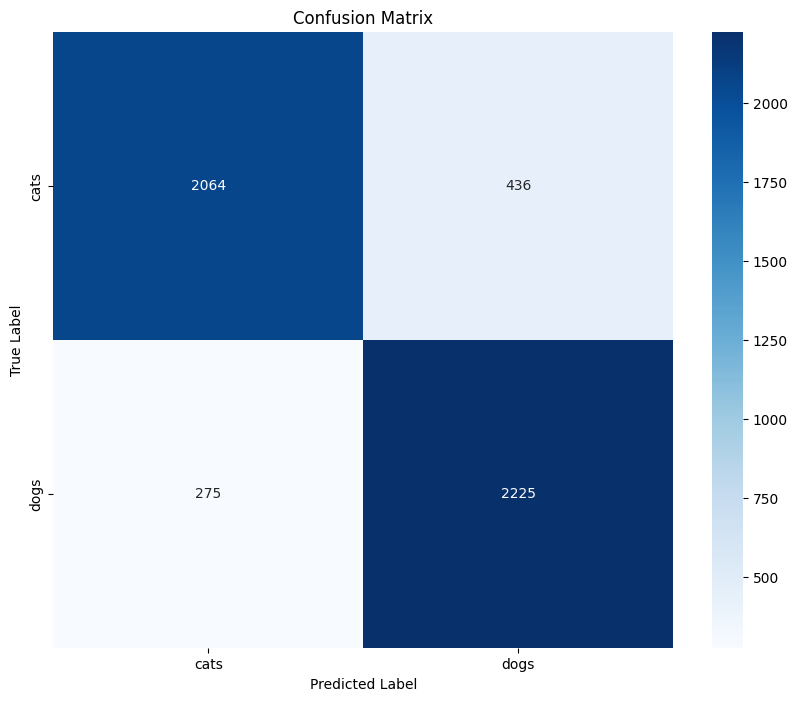

In [81]:
plt.figure(figsize = (10 , 8))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = class_labels ,yticklabels = class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

### Inference

In [83]:
loss , accuracy = model.evaluate(test_generator)
print(f"Test Accuracy = : {accuracy*100:.2f}%")
print(f"Test Loss = {loss:.2f}%")

250/250 [==============================] - 6s 23ms/step - loss: 0.4512 - accuracy: 0.8578
Test Accuracy = : 85.78%
Test Loss = 0.45%


## Single Image Prediction 

In [115]:
def make_prediction(image_path):
    img = load_img(image_path , target_size = (150 , 150))
    # img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    

    img_array = np.expand_dims(img_array , axis = 0) # added dimension
    img_array /= 255.

    prediction = model.predict(img_array)
    print("Prediction: " , prediction)

    #original Image :
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    #prediction
    plt.subplot(122)
    if prediction[0][0] >0.5:
        plt.title('Predicted : Dog')
    else :
        plt.title('Predicted : Cat')
    plt.imshow(img)
    plt.axis('off')

    plt.show()
            

1/1 [==============================] - 0s 20ms/step
Prediction:  [[0.99978286]]


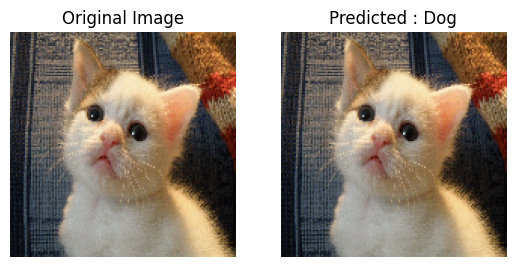

In [116]:
img_path = 'data/R.jpeg'
make_prediction(img_path)

### MisClassification

In [132]:
test_generator.reset()

predictions = model.predict(test_generator , verbose = 1)

predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes

misclassifier_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassifier_indices)

print(f"Total Misclassifier in the test set : { misclassified_count} out of {len(true_classes)}")


250/250 [==============================] - 8s 30ms/step
Total Misclassifier in the test set : 711 out of 5000


### Visualising the kernel feature maps

In [133]:
# get all layers in which conv is present

for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    filters , biases = model.layers[i].get_weights()
    print("layer number" , i , model.layers[i].name , filters.shape)

layer number 0 conv2d_4 (3, 3, 3, 32)
layer number 2 conv2d_5 (3, 3, 32, 64)
layer number 4 conv2d_6 (3, 3, 64, 128)
layer number 6 conv2d_7 (3, 3, 128, 128)


In [134]:
# retriving weights from the second hidden layer

filters , bias = model.layers[2].get_weights()

In [135]:
filters.shape , bias.shape

((3, 3, 32, 64), (64,))

In [139]:
# normalize the filter values to 0-1 for easy visualization 

f_min , f_max = filters.min() , filters.max()
filters = (filters - f_min)/(f_max - f_min)

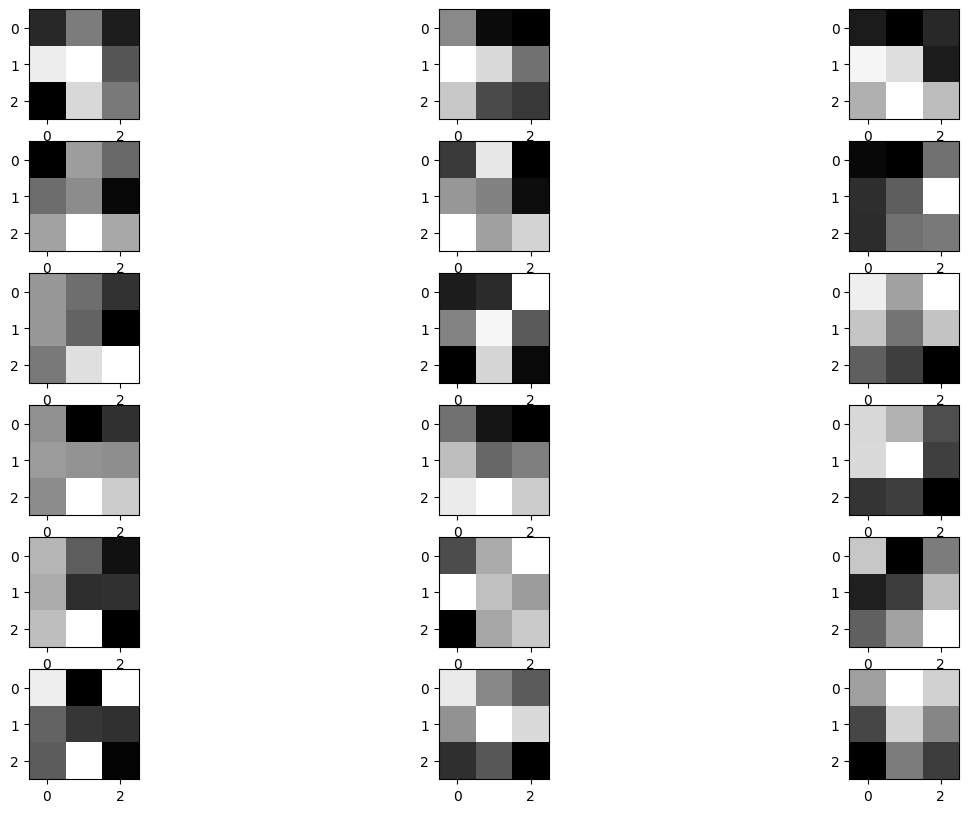

In [141]:
n_filters = 6
ix = 1

fig = plt.figure(figsize = (15 , 10))
for i in range(n_filters):
    f = filters[:,: ,: , i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters , 3 , ix)
        plt.imshow(f[:,:,j] , cmap ='grey')
        ix += 1
plt.show()

1/1 [==============================] - 0s 41ms/step


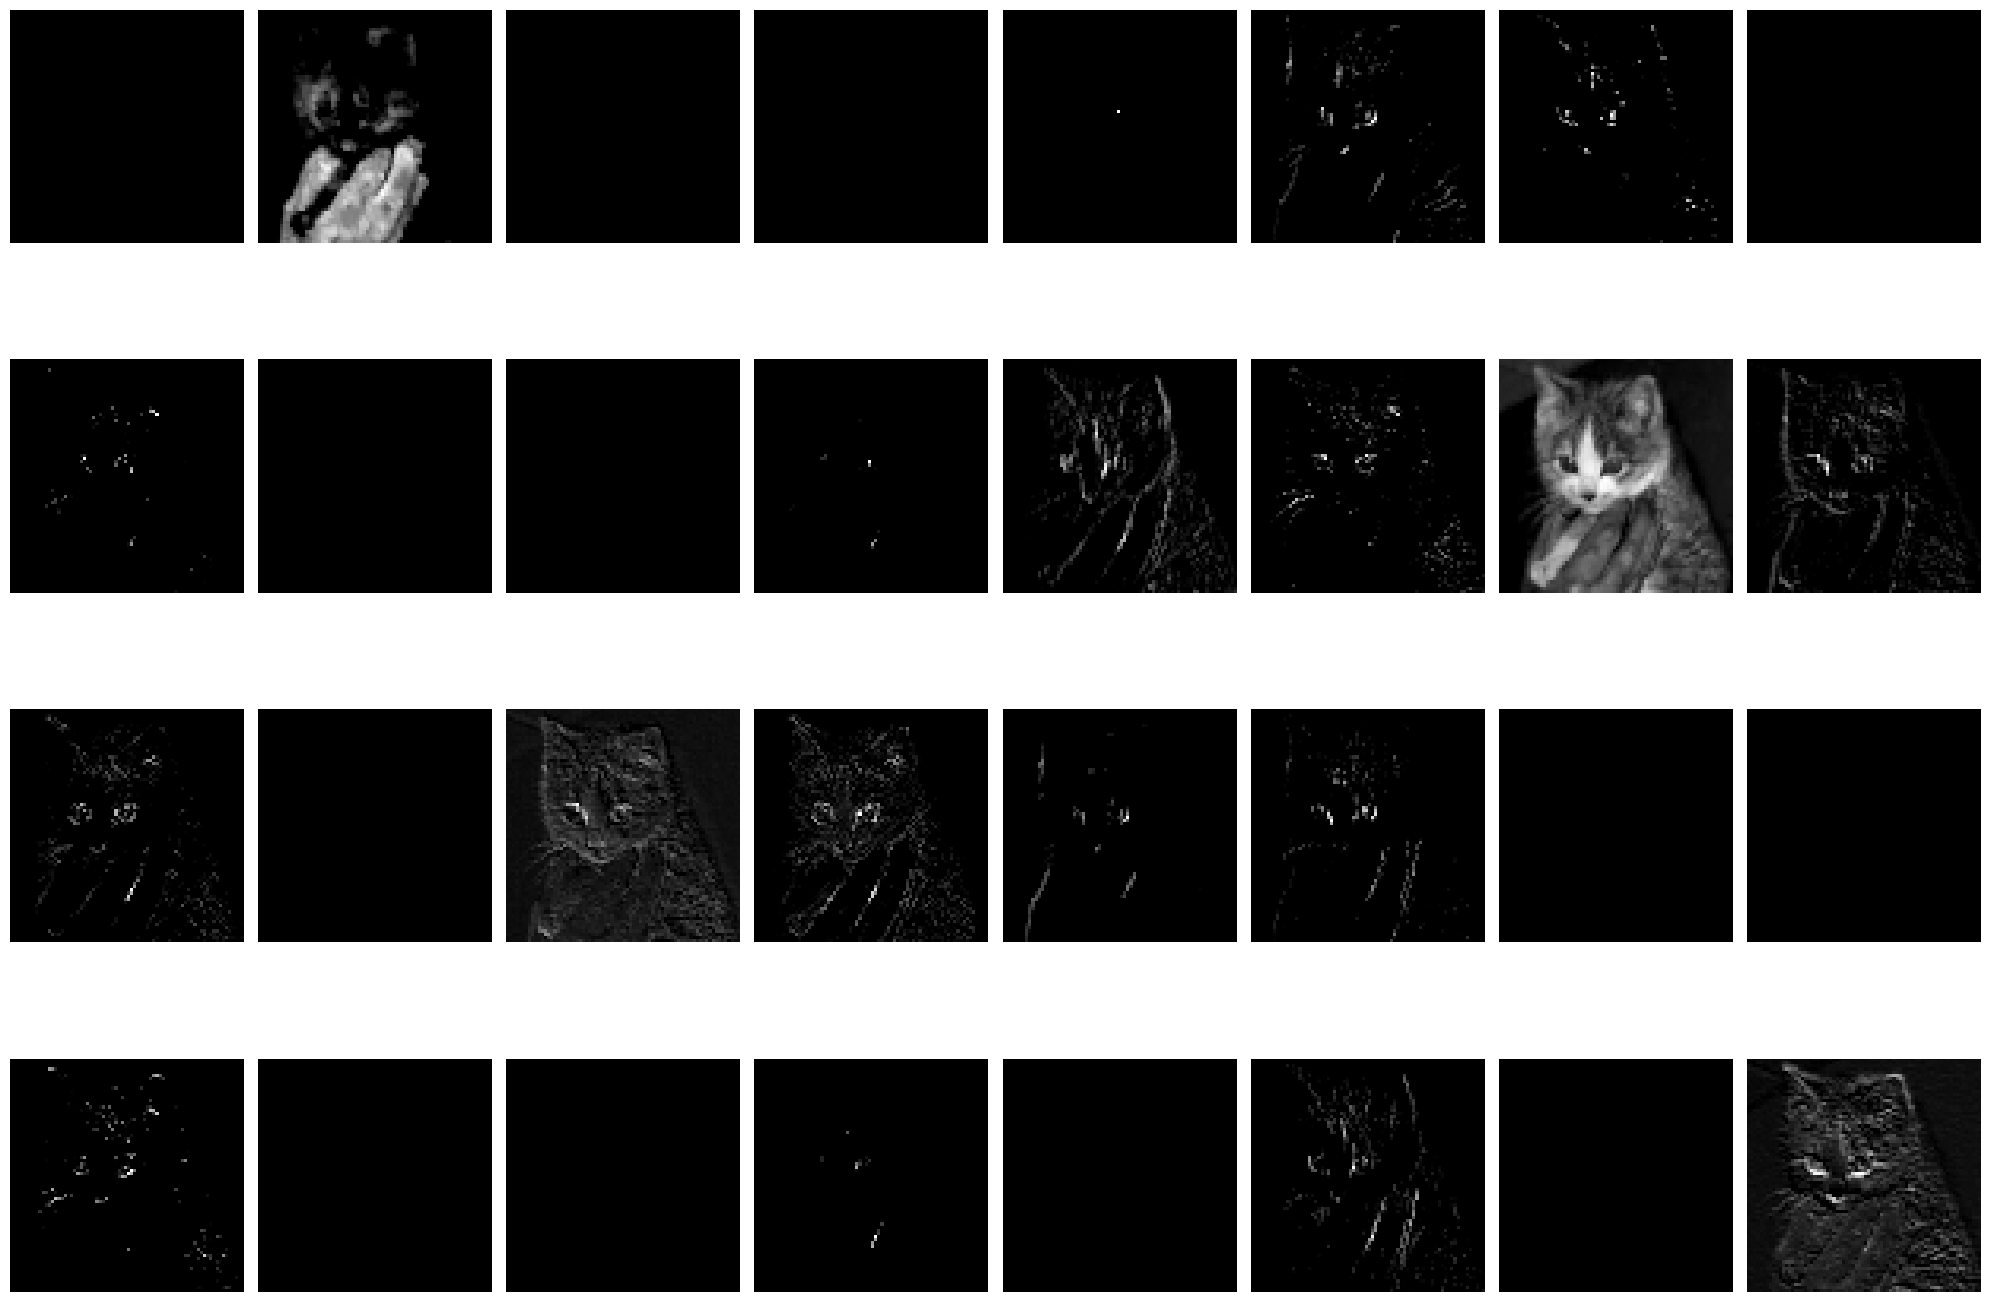

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img , img_to_array
import tensorflow as tf

model2 = tf.keras.Model(inputs = model.inputs , outputs = model.layers[1].output)

image = load_img('data/train/cats/cat.10002.jpg' , target_size = (150,150))
image = img_to_array(image)
image = np.expand_dims(image , axis = 0)
image /=255.0

features = model2.predict(image)

num_features_map = features.shape[-1]
num_cols = 8
num_rows = num_features_map // num_cols + (1 if num_features_map % num_cols else 0)

fig = plt.figure(figsize = (20 , 15))
for i in range(1 , num_features_map +1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()